# Cosmic Ray Proton Spectrum Fitting

In [249]:
from pylab import *
from scipy.optimize import minimize 

## PAMELA data from Adriani et al., Science 332, 69 (2011)
### Data sets columns:
#### [0] Quantity $\quad$ [1] $<R>$ (GV) $\quad$ [2] Bin range $\quad$ [3] Flux (per R bin)  (GV m2 s sr)-1 $\quad$ [4] Stat Err $\quad$ [5] Syst Err

### * *More recent data in Adriani et al., ApJ 765, 91 (2013)*

In [227]:
Z = 1
data_PAMELA_H = np.genfromtxt("Data/PAMELA_H_data.txt")
R_PAMELA = data_PAMELA_H[:,1]
E_PAMELA = R_PAMELA * Z
flux_R_PAMELA = data_PAMELA_H[:,3]
flux_PAMELA = flux_R_PAMELA / Z
error_PAMELA_stat = data_PAMELA_H[:,4]/Z; error_PAMELA_syst = data_PAMELA_H[:,5]/Z
error_PAMELA = np.sqrt(error_PAMELA_stat**2 + error_PAMELA_syst**2)

## AMS02 data from Aguilar et al., PRL 114, 171103 (2015)
### Data sets columns:
#### [0] Quantity $\quad$ [1] $<R>$ (GV) $\quad$ [2] Bin range $\quad$ [3] Flux (per R bin)  (GV m2 s sr)-1 $\quad$ [4] Stat Err $\quad$ [5] Syst Err

### * *More recent data in Aguilar et al., PhR 894, 1 (2021)*

In [230]:
Z = 1
data_AMS02_H = np.genfromtxt("Data/AMS02_H_data.txt")
R_AMS02 = data_AMS02_H[:,1]
E_AMS02 = R_AMS02 * Z
flux_R_AMS02 = data_AMS02_H[:,3]
flux_AMS02 = flux_R_AMS02 / Z
error_AMS02_stat = data_AMS02_H[:,4]/Z; error_AMS02_syst = data_AMS02_H[:,5]/Z
error_AMS02 = np.sqrt(error_AMS02_stat**2 + error_AMS02_syst**2)

## DAMPE data from An et al., SciA 5, eaax3793 (2019)
### Data sets columns:
#### [0] Quantity $\quad$ [1] $<Ek>$ (GeV) $\quad$ [2] Bin range $\quad$ [3] Flux (per Ek bin)  (GeV m2 s sr)-1 $\quad$ [4] Stat Err $\quad$ [5] Syst Err

In [87]:
data_DAMPE_H = np.genfromtxt("Data/DAMPE_H_data.txt")
E_DAMPE = data_DAMPE_H[:,1]
flux_DAMPE = data_DAMPE_H[:,3]
error_DAMPE_stat = data_DAMPE_H[:,4]; error_DAMPE_syst = data_DAMPE_H[:,5]
error_DAMPE = np.sqrt(error_DAMPE_stat**2 + error_DAMPE_syst**2)

## CALET data from Adriani et al., PhRvL 122, 181102 (2019)
### Data sets columns:
#### [0] Quantity $\quad$ [1] $<Ek>$ (GeV) $\quad$ [2] Bin range $\quad$ [3] Flux (per Ek bin)  (GeV m2 s sr)-1 $\quad$ [4] Stat Err $\quad$ [5] Syst Err (-) $\quad$ [6] Syst Err (+)

### * *More recent data in Adriani et al., PhRvL 129, 101102 (2022)*

In [88]:
Z = 1
data_CALET_H = np.genfromtxt("Data/CALET_H_data.txt")
R_CALET = data_CALET_H[:,1]
E_CALET = R_CALET * Z
flux_R_CALET = data_CALET_H[:,3]
flux_CALET = flux_R_CALET / Z
error_CALET_stat = data_CALET_H[:,4]/Z; error_CALET_syst_low = data_CALET_H[:,5]/Z; error_CALET_syst_up = data_CALET_H[:,6]/Z
error_CALET_low = np.sqrt(error_CALET_stat**2 + error_CALET_syst_low**2)
error_CALET_up = np.sqrt(error_CALET_stat**2 + error_CALET_syst_up**2)

## CREAM data from Yoon et al., ApJ 839, 5 (2017)
### Data sets colums
#### [0] Quantity $\quad$ [1] $<Ek/n>$ (GeV) $\quad$ [2] Bin range $\quad$ [3] Flux (per Ek/n bin)  (GeV m2 s sr)-1 $\quad$ [4] Stat Err (-) $\quad$ [5] Stat Err (+) $\quad$ [6] Syst Err

In [89]:
n = 1
data_CREAM_H = np.genfromtxt("Data/CREAM_H_data.txt")
E_CREAM = data_CREAM_H[:,1] * n
flux_CREAM = data_CREAM_H[:,3] / n
error_CREAM_stat_low = data_CREAM_H[:,4]/n; error_CREAM_stat_up = data_CREAM_H[:,5]/n; error_CREAM_syst = data_CREAM_H[:,6]/n
error_CREAM_low = np.sqrt(error_CREAM_stat_low**2 + error_CREAM_syst**2)
error_CREAM_up = np.sqrt(error_CREAM_stat_up**2 + error_CREAM_syst**2)

## ATIC data from Panov et al., Bull. Russian Acad. Sci. 73, 564 (2009)
### Data sets colums
#### [0] Quantity $\quad$ [1] $<Etot>$ (GeV) $\quad$ [2] Bin range $\quad$ [3] Flux (per Etot bin)  (GeV m2 s sr)-1 $\quad$ [4] Stat Err $\quad$ [5] Syst Err

In [90]:
data_ATIC_H = np.genfromtxt("Data/ATIC_H_data.txt")
E_ATIC = data_ATIC_H[:,1]
flux_ATIC = data_ATIC_H[:,3]
error_ATIC = data_ATIC_H[:,4]

## NUCLEON data from Grebenyuk et al., AdSpR 64, 2546 (2019)
### Data sets colums
#### [0] Quantity $\quad$ [1] $<Etot>$ (GeV) $\quad$ [2] Bin range $\quad$ [3] Flux (per Etot bin)  (GeV m2 s sr)-1 $\quad$ [4] Stat Err $\quad$ [5] Syst Err

In [91]:
data_NUCLEON_H = np.genfromtxt("Data/NUCLEON_H_data.txt")
E_NUCLEON = data_NUCLEON_H[:,1]
flux_NUCLEON = data_NUCLEON_H[:,3]
error_NUCLEON = data_NUCLEON_H[:,4]

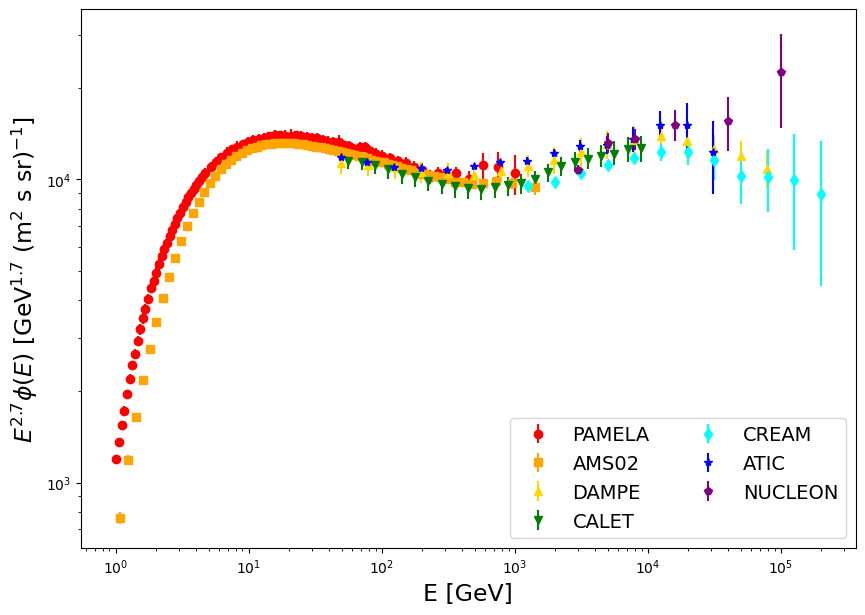

In [311]:
plt.figure(figsize=(10, 7))
plt.errorbar(E_PAMELA, flux_PAMELA * E_PAMELA**2.7, yerr=error_PAMELA * E_PAMELA**2.7, fmt='o', color='red', label='PAMELA')
plt.errorbar(E_AMS02, flux_AMS02 * E_AMS02**2.7, yerr=error_AMS02 * E_AMS02**2.7, fmt='s', color='orange', label='AMS02')
plt.errorbar(E_DAMPE, flux_DAMPE * E_DAMPE**2.7, yerr=error_DAMPE * E_DAMPE**2.7, fmt='^', color='gold', label='DAMPE')
plt.errorbar(E_CALET, flux_CALET * E_CALET**2.7, yerr=(error_CALET_low,error_CALET_up) * E_CALET**2.7, fmt='v', color='green', label='CALET')
plt.errorbar(E_CREAM, flux_CREAM * E_CREAM**2.7, yerr=(error_CREAM_low,error_CREAM_low) * E_CREAM**2.7, fmt='d', color='cyan', label='CREAM')
plt.errorbar(E_ATIC, flux_ATIC * E_ATIC**2.7, yerr=error_ATIC * E_ATIC**2.7, fmt='*', color='blue', label='ATIC')
plt.errorbar(E_NUCLEON, flux_NUCLEON * E_NUCLEON**2.7, yerr=error_NUCLEON * E_NUCLEON**2.7, fmt='p', color='purple', label='NUCLEON')
plt.loglog()
plt.xlabel('E [GeV]', fontsize=17)
plt.ylabel(r'$E^{2.7}\phi(E)$ [GeV$^{1.7}$ (m$^2$ s sr)$^{-1}$]', fontsize=17)
plt.legend(ncol=2, fontsize=14)

## Model by (Lipari $\&$ Vernetto, 2019) for hardening and softening of proton spectrum

In [165]:
def Phi_Lipari(E, K, E0, alpha1, alpha2, alpha3, omega1, omega2, Eb1, Eb2):
    delta1 = alpha2 - alpha1
    delta2 = alpha3 - alpha2
    return K * (E/E0)**(-alpha1) * (1 + (E/Eb1)**(1/omega1))**(-delta1 * omega1) * (1 + (E/Eb2)**(1/omega2))**(-delta2 * omega2)

In [166]:
#PAMELA

alpha1 = 2.85
alpha2 = 2.67
alpha3 = alpha2
Eb1 = 0.232 * 1e3
omega1 = 0.25
Eb2 = Eb1 
omega2 = omega1
K = 4.60 * 10**(-2)
E0 = 0.1 * 1e3

Phi_PAMELA = Phi_Lipari(E_PAMELA, K, E0, alpha1, alpha2, alpha3, omega1, omega2, Eb1, Eb2)

In [167]:
#AMS02

alpha1 = 2.849
alpha2 = 2.716
alpha3 = alpha2
Eb1 = 0.275 * 1e3
omega1 = 0.34
Eb2 = Eb1
omega2 = omega1
K = 4.4 * 10**(-2)
E0 = 0.1 * 1e3

Phi_AMS02 = Phi_Lipari(E_AMS02, K, E0, alpha1, alpha2, alpha3, omega1, omega2, Eb1, Eb2)

In [168]:
#DAMPE

alpha1 = 2.75
alpha2 = 2.58
alpha3 = 2.86
Eb1 = 0.574 * 1e3
omega1 = 0.35
Eb2 = 12.8 * 1e3
omega2 = 0.37
K = 5.55 * 10**(-2)
E0 = 0.1 * 1e3

Phi_DAMPE = Phi_Lipari(E_DAMPE, K, E0, alpha1, alpha2, alpha3, omega1, omega2, Eb1, Eb2)

In [169]:
#CALET

alpha1 = 2.81
alpha2 = 2.55
alpha3 = alpha2
Eb1 = 0.605 * 1e3
omega1 = 0.25
Eb2 = Eb1
omega2 = omega1
K = 4.34 * 10**(-2)
E0 = 0.1 * 1e3

Phi_CALET = Phi_Lipari(E_CALET, K, E0, alpha1, alpha2, alpha3, omega1, omega2, Eb1, Eb2)

In [170]:
#CREAM

alpha1 = alpha2
alpha2 = 2.58
alpha3 = 2.84
Eb1 = Eb2
omega1 = omega2
Eb2 = 16 * 1e3
omega2 = 0.5
K = 1.22 * 10**(-5)
E0 = 2 * 1e3

Phi_CREAM = Phi_Lipari(E_CREAM, K, E0, alpha1, alpha2, alpha3, omega1, omega2, Eb1, Eb2)

In [174]:
#ATIC

alpha1 = 2.79
alpha2 = 2.62
alpha3 = alpha2
Eb1 = 0.275 * 1e3
omega1 = 0.34
Eb2 = Eb1
omega2 = omega1
K = 4.4 * 10**(-2)
E0 = 0.1 * 1e3

Phi_ATIC = Phi_Lipari(E_ATIC, K, E0, alpha1, alpha2, alpha3, omega1, omega2, Eb1, Eb2)

In [175]:
#NUCLEON

alpha1 = alpha2
alpha2 = 2.44
alpha3 = 2.86
Eb1 = Eb2
omega1 = omega2
Eb2 = 9.5 * 1e3
omega2 = 0.24
K = 1.26 * 10**(-5)
E0 = 2 * 1e3

Phi_NUCLEON = Phi_Lipari(E_NUCLEON, K, E0, alpha1, alpha2, alpha3, omega1, omega2, Eb1, Eb2)

In [254]:
#All detectors

logE = np.arange(0,6,0.1)
E = 10**logE

alpha1 = 2.80
alpha2 = 2.57
alpha3 = 2.87
Eb1 = 0.67 * 1e3
omega1 = 0.27
Eb2 = 16 * 1e3
omega2 = 0.35
K = 4.40 * 10**(-2)
E0 = 0.1 * 1e3

Phi_all = Phi_Lipari(E, K, E0, alpha1, alpha2, alpha3, omega1, omega2, Eb1, Eb2)

Text(0.5, 1.0, 'CALET')

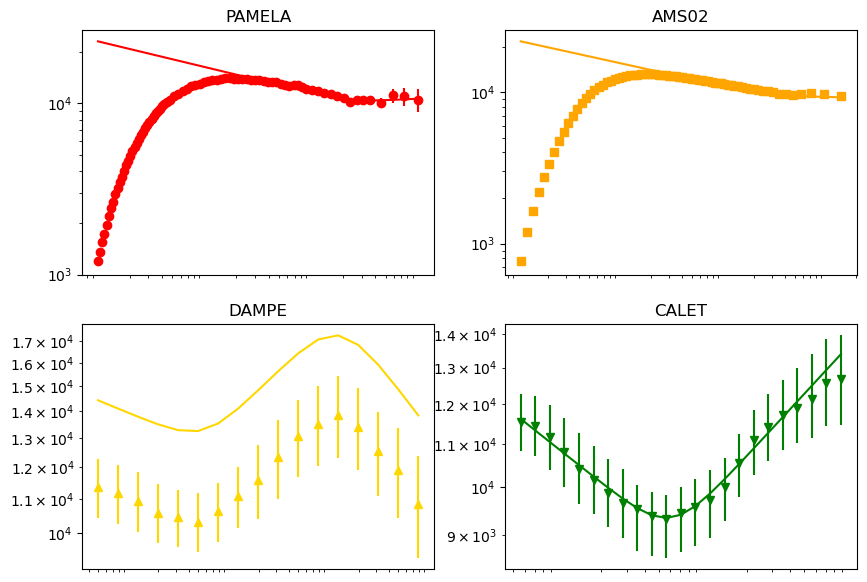

In [171]:
fig, ax = plt.subplots(2, 2, figsize=(10, 7))
#
ax[0,0].plot(E_PAMELA, Phi_PAMELA* E_PAMELA**2.7, color='red')
ax[0,0].errorbar(E_PAMELA, flux_PAMELA * E_PAMELA**2.7, yerr=error_PAMELA * E_PAMELA**2.7, fmt='o', color='red', label='PAMELA')
ax[0,0].loglog()
ax[0,0].set_xticks([])
ax[0,0].set_title('PAMELA')
#
ax[0,1].plot(E_AMS02, Phi_AMS02* E_AMS02**2.7, color='orange')
ax[0,1].errorbar(E_AMS02, flux_AMS02 * E_AMS02**2.7, yerr=error_AMS02 * E_AMS02**2.7, fmt='s', color='orange', label='AMS02')
ax[0,1].loglog()
ax[0,1].set_xticks([])
ax[0,1].set_title('AMS02')
#
ax[1,0].plot(E_DAMPE, Phi_DAMPE* E_DAMPE**2.7, color='gold')
ax[1,0].errorbar(E_DAMPE, flux_DAMPE * E_DAMPE**2.7, yerr=error_DAMPE * E_DAMPE**2.7, fmt='^', color='gold', label='DAMPE')
ax[1,0].loglog()
ax[1,0].set_xticks([])
ax[1,0].set_title('DAMPE')
#
ax[1,1].plot(E_CALET, Phi_CALET* E_CALET**2.7, color='green')
ax[1,1].errorbar(E_CALET, flux_CALET * E_CALET**2.7, yerr=(error_CALET_low,error_CALET_up) * E_CALET**2.7, fmt='v', color='green', label='CALET')
ax[1,1].loglog()
ax[1,1].set_xticks([])
ax[1,1].set_title('CALET')

Text(0.5, 1.0, 'All detectors')

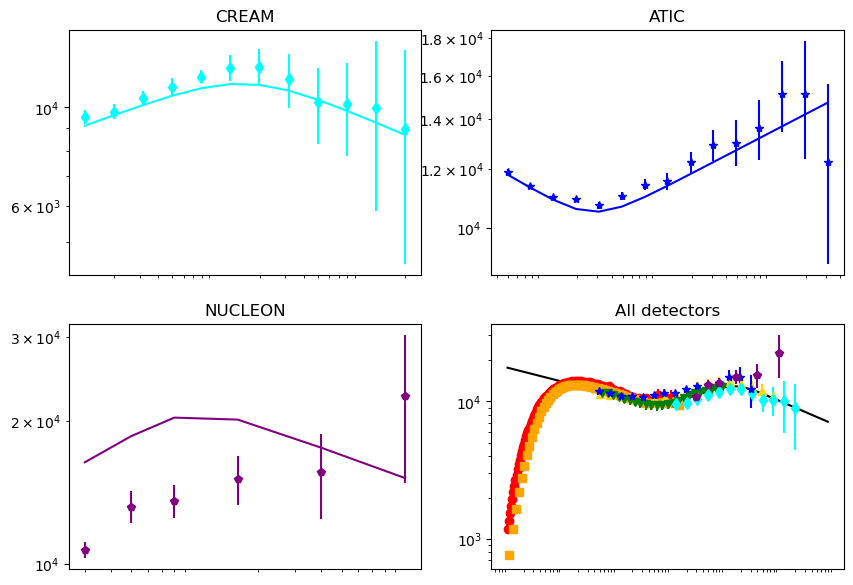

In [186]:
fig, ax = plt.subplots(2, 2, figsize=(10, 7))
#
ax[0,0].plot(E_CREAM, Phi_CREAM* E_CREAM**2.7, color='cyan')
ax[0,0].errorbar(E_CREAM, flux_CREAM * E_CREAM**2.7, yerr=(error_CREAM_low,error_CREAM_low) * E_CREAM**2.7, fmt='d', color='cyan', label='CREAM')
ax[0,0].loglog()
ax[0,0].set_xticks([])
ax[0,0].set_title('CREAM')
#
ax[0,1].plot(E_ATIC, Phi_ATIC* E_ATIC**2.7, color='blue')
ax[0,1].errorbar(E_ATIC, flux_ATIC * E_ATIC**2.7, yerr=error_ATIC * E_ATIC**2.7, fmt='*', color='blue', label='ATIC')
ax[0,1].loglog()
ax[0,1].set_xticks([])
ax[0,1].set_title('ATIC')
#
ax[1,0].plot(E_NUCLEON, Phi_NUCLEON* E_NUCLEON**2.7, color='purple')
ax[1,0].errorbar(E_NUCLEON, flux_NUCLEON * E_NUCLEON**2.7, yerr=error_NUCLEON * E_NUCLEON**2.7, fmt='p', color='purple', label='NUCLEON')
ax[1,0].loglog()
ax[1,0].set_xticks([])
ax[1,0].set_title('NUCLEON')
#
ax[1,1].plot(E, Phi_all* E**2.7, color='black')
ax[1,1].errorbar(E_PAMELA, flux_PAMELA * E_PAMELA**2.7, yerr=error_PAMELA * E_PAMELA**2.7, fmt='o', color='red')
ax[1,1].errorbar(E_AMS02, flux_AMS02 * E_AMS02**2.7, yerr=error_AMS02 * E_AMS02**2.7, fmt='s', color='orange')
ax[1,1].errorbar(E_DAMPE, flux_DAMPE * E_DAMPE**2.7, yerr=error_DAMPE * E_DAMPE**2.7, fmt='^', color='gold', label='DAMPE')
ax[1,1].errorbar(E_CALET, flux_CALET * E_CALET**2.7, yerr=(error_CALET_low,error_CALET_up) * E_CALET**2.7, fmt='v', color='green', label='CALET')
ax[1,1].errorbar(E_CREAM, flux_CREAM * E_CREAM**2.7, yerr=(error_CREAM_low,error_CREAM_low) * E_CREAM**2.7, fmt='d', color='cyan', label='CREAM')
ax[1,1].errorbar(E_ATIC, flux_ATIC * E_ATIC**2.7, yerr=error_ATIC * E_ATIC**2.7, fmt='*', color='blue', label='ATIC')
ax[1,1].errorbar(E_NUCLEON, flux_NUCLEON * E_NUCLEON**2.7, yerr=error_NUCLEON * E_NUCLEON**2.7, fmt='p', color='purple', label='NUCLEON')
ax[1,1].loglog()
ax[1,1].set_xticks([])
ax[1,1].set_title('All detectors')

Text(0.5, 1.0, 'All detectors')

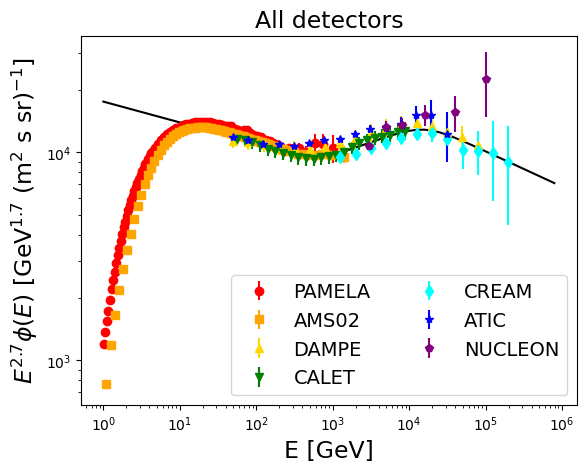

In [192]:
plt.plot(E, Phi_all* E**2.7, color='black')
plt.errorbar(E_PAMELA, flux_PAMELA * E_PAMELA**2.7, yerr=error_PAMELA * E_PAMELA**2.7, fmt='o', color='red', label='PAMELA')
plt.errorbar(E_AMS02, flux_AMS02 * E_AMS02**2.7, yerr=error_AMS02 * E_AMS02**2.7, fmt='s', color='orange', label='AMS02')
plt.errorbar(E_DAMPE, flux_DAMPE * E_DAMPE**2.7, yerr=error_DAMPE * E_DAMPE**2.7, fmt='^', color='gold', label='DAMPE')
plt.errorbar(E_CALET, flux_CALET * E_CALET**2.7, yerr=(error_CALET_low,error_CALET_up) * E_CALET**2.7, fmt='v', color='green', label='CALET')
plt.errorbar(E_CREAM, flux_CREAM * E_CREAM**2.7, yerr=(error_CREAM_low,error_CREAM_low) * E_CREAM**2.7, fmt='d', color='cyan', label='CREAM')
plt.errorbar(E_ATIC, flux_ATIC * E_ATIC**2.7, yerr=error_ATIC * E_ATIC**2.7, fmt='*', color='blue', label='ATIC')
plt.errorbar(E_NUCLEON, flux_NUCLEON * E_NUCLEON**2.7, yerr=error_NUCLEON * E_NUCLEON**2.7, fmt='p', color='purple', label='NUCLEON')
plt.loglog()
plt.xlabel('E [GeV]', fontsize=17)
plt.ylabel(r'$E^{2.7}\phi(E)$ [GeV$^{1.7}$ (m$^2$ s sr)$^{-1}$]', fontsize=17)
plt.legend(ncol=2, fontsize=14)
plt.title('All detectors', fontsize=17)

## $\chi^2$-minimzation fit
### $\chi^2(K, E_0, \alpha_1, \alpha_2, \alpha_3, E_b, \omega, E'_b, \omega') = \sum_j\sum_i \frac{\left(\phi_j(E_i)-\phi(E_i; K, E_0, \alpha_1, \alpha_2, \alpha_3, E_b, \omega, E'_b, \omega')\right)^2}{\sigma_{i,j}^2}$

In [282]:
E = np.append(np.append(np.append(np.append(np.append(np.append(E_PAMELA, E_AMS02), E_DAMPE), E_CALET), E_CREAM), E_ATIC), E_NUCLEON)
Flux = np.append(np.append(np.append(np.append(np.append(np.append(flux_PAMELA, flux_AMS02), flux_DAMPE), flux_CALET), flux_CREAM), flux_ATIC), flux_NUCLEON)
Sigma = np.append(np.append(np.append(np.append(np.append(np.append(2*error_PAMELA, 2*error_AMS02), 2*error_DAMPE), error_CALET_low+error_CALET_up), error_CREAM_low+error_CREAM_up), 2*error_ATIC), 2*error_NUCLEON)

index = np.where(np.logical_and(E>=1e2, E<=1e5))

E = E[index]
Flux = Flux[index]
Sigma = Sigma[index]

def Chi(parameters):
    K, E0, alpha1, alpha2, alpha3, omega1, omega2, Eb1, Eb2 = parameters
    Phi_model = Phi_Lipari(E, K, E0, alpha1, alpha2, alpha3, omega1, omega2, Eb1, Eb2)
    return sum( (Phi_model - Flux)**2 / Sigma**2) / (len(Flux) - len(parameters))

In [283]:
# Best fit value 

parameters = 4.40 * 10**(-2), 0.1 * 1e3, 2.80, 2.57, 2.87, 0.27, 0.35, 0.67 * 1e3, 16 * 1e3
Chi(parameters)

1.368925749049401

In [310]:
# Initial guess
alpha1 = 2.80
alpha2 = 2.57
alpha3 = 2.87
Eb1 = 0.67 * 1e3
omega1 = 0.27
Eb2 = 16 * 1e3
omega2 = 0.35
K = 4.40 * 10**(-2)
E0 = 0.1 * 1e3

print('LIPARI & VERNETTO BEST FIT VALUES:')
print('K:', round(K,3)); print('E_0:', round(E0,3), 'GeV'); print('alpha_1:', round(alpha1,3))
print('alpha_2:', round(alpha2,3)); print('alpha_3:', round(alpha3,3)); print('omega:', round(omega1,3))
print('omega_primed:', round(omega2,3)); print('E_b:', round(Eb1,3), 'GeV'); print('E_b_primed:', round(Eb2,3), 'GeV')
print('')

# Minimization of chi^2
output = minimize(Chi, (K, E0, alpha1, alpha2, alpha3, omega1, omega2, Eb1, Eb2), method='L-BFGS-B')
best_fit_values = output['x']

# Best fit values
K, E0, alpha1, alpha2, alpha3, omega1, omega2, Eb1, Eb2 = best_fit_values
print('MY BEST FIT VALUES:')
print('K:', round(best_fit_values[0],3)); print('E_0:', round(best_fit_values[1],3), 'GeV'); print('alpha_1:', round(best_fit_values[2],3))
print('alpha_2:', round(best_fit_values[3],3)); print('alpha_3:', round(best_fit_values[4],3)); print('omega:', round(best_fit_values[5],3))
print('omega_primed:', round(best_fit_values[6],3)); print('E_b:', round(best_fit_values[7],3), 'GeV'); print('E_b_primed:', round(best_fit_values[8],3), 'GeV')

LIPARI & VERNETTO BEST FIT VALUES:
K: 0.044
E_0: 100.0 GeV
alpha_1: 2.8
alpha_2: 2.57
alpha_3: 2.87
omega: 0.27
omega_primed: 0.35
E_b: 670.0 GeV
E_b_primed: 16000.0 GeV

MY BEST FIT VALUES:
K: 0.033
E_0: 100.001 GeV
alpha_1: 2.916
alpha_2: 2.466
alpha_3: 2.781
omega: 2.038
omega_primed: 0.016
E_b: 669.999 GeV
E_b_primed: 16000.0 GeV


/var/folders/j4/1fvnmc755y74k9kgn5w7_s400000gn/T/ipykernel_94199/2483709905.py:4: RuntimeWarning: overflow encountered in power
  return K * (E/E0)**(-alpha1) * (1 + (E/Eb1)**(1/omega1))**(-delta1 * omega1) * (1 + (E/Eb2)**(1/omega2))**(-delta2 * omega2)


Text(0.5, 1.0, 'All detectors')

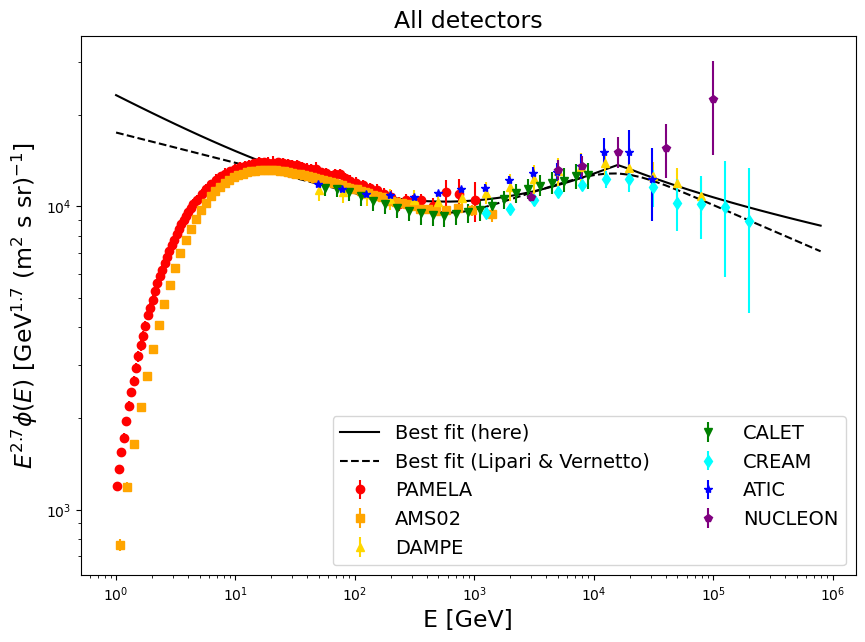

In [280]:
logE = np.arange(0,6,0.1)
E = 10**logE
Phi_us = Phi_Lipari(E, K, E0, alpha1, alpha2, alpha3, omega1, omega2, Eb1, Eb2)

plt.figure(figsize=(10, 7))
plt.plot(E, Phi_us* E**2.7, color='black', label='Best fit (here)')
plt.plot(E, Phi_all* E**2.7, '--', color='black', label='Best fit (Lipari & Vernetto)')
plt.errorbar(E_PAMELA, flux_PAMELA * E_PAMELA**2.7, yerr=error_PAMELA * E_PAMELA**2.7, fmt='o', color='red', label='PAMELA')
plt.errorbar(E_AMS02, flux_AMS02 * E_AMS02**2.7, yerr=error_AMS02 * E_AMS02**2.7, fmt='s', color='orange', label='AMS02')
plt.errorbar(E_DAMPE, flux_DAMPE * E_DAMPE**2.7, yerr=error_DAMPE * E_DAMPE**2.7, fmt='^', color='gold', label='DAMPE')
plt.errorbar(E_CALET, flux_CALET * E_CALET**2.7, yerr=(error_CALET_low,error_CALET_up) * E_CALET**2.7, fmt='v', color='green', label='CALET')
plt.errorbar(E_CREAM, flux_CREAM * E_CREAM**2.7, yerr=(error_CREAM_low,error_CREAM_low) * E_CREAM**2.7, fmt='d', color='cyan', label='CREAM')
plt.errorbar(E_ATIC, flux_ATIC * E_ATIC**2.7, yerr=error_ATIC * E_ATIC**2.7, fmt='*', color='blue', label='ATIC')
plt.errorbar(E_NUCLEON, flux_NUCLEON * E_NUCLEON**2.7, yerr=error_NUCLEON * E_NUCLEON**2.7, fmt='p', color='purple', label='NUCLEON')
plt.loglog()
plt.xlabel('E [GeV]', fontsize=17)
plt.ylabel(r'$E^{2.7}\phi(E)$ [GeV$^{1.7}$ (m$^2$ s sr)$^{-1}$]', fontsize=17)
plt.legend(ncol=2, fontsize=14)
plt.title('All detectors', fontsize=17)